In [1]:
import pandas as pd
import os


###  Load Data ###

The data used to this task is stored in csv files.
There is one csv file for each month.


In [2]:
data_dir = "Sales_Data/"
files = [file for file in os.listdir(data_dir)]

df = pd.read_csv(os.path.join(data_dir,files[0]))
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Merge data in all files

In [3]:
all_data = pd.DataFrame()
for file in files:
    
    f = os.path.join(data_dir,file)
    df1 = pd.read_csv(f)
    all_data = pd.concat([all_data,df1])
    
all_data.to_csv("all_data.csv",index=False)
print(all_data.shape)

(186850, 6)


### Read data from merged file


In [4]:
all_data = pd.read_csv("all_data.csv")
all_data.head()
#print(all_data.shape)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Cleaning

these are the basic step of data cleaning.

1. remove Nan values
2. remove duplicates

<br/>

and other cleaning data tasks are based on the situation and the requirement.

In [5]:
## select rows contain Nan values
Nan_rows = all_data[all_data.isnull().any(axis=1)]
print(Nan_rows.shape)
print(all_data.shape)

(545, 6)
(186850, 6)


In [6]:
##drop rows contain NaN values
all_data = all_data.dropna(how = 'any')
print(all_data.shape)

(186305, 6)


In [ ]:
#remove duplicates

In [ ]:
all_data = all_data.drop_duplicates(subset ="Order ID", keep = False, inplace = True) 
print(all_data.shape)

In [ ]:
x = all_data.dtypes
x

# TASK 01 : find the best month for sales and show sales in each month


Step 1: Data augmentation -create additiona columns to extract information


In [7]:
#remove not related data in month column; 
#found error: invalid literal for int() with base 10: 'Or' 
# invaid strings in mnth column

all_data = all_data[all_data["Order Date"].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


###  STEP 2 : Add month column

In [8]:


all_data["month"] = all_data["Order Date"].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [9]:
#convert month data column to numeric type
all_data["month"] = all_data["month"].astype('int32')

### STEP 3: calculate sale

In [10]:
### correct data types

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [11]:
## calculate sale
all_data['sale'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [12]:
#find sale of each mnth

results = all_data.groupby('month').sum()
results

,Quantity Ordered,Price Each,sale
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


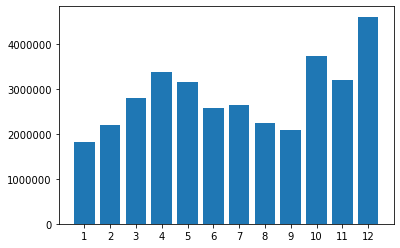

In [14]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,results['sale'])
plt.xticks(months)
plt.show()

# TASK 02: what city have the heighest number of sales?

In [20]:
## extract cites
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['city'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sale,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [21]:
#sales in each month
results = all_data.groupby('city').sum()
results

,Quantity Ordered,Price Each,month,sale
city,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


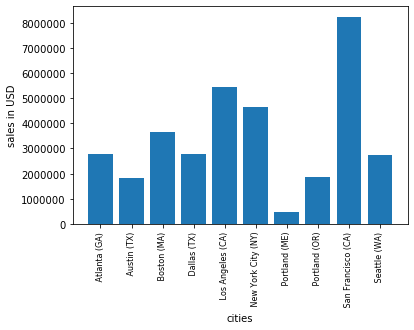

In [25]:
ci = all_data['city'].unique() #this is not working the city order needs to match with cities in results table
#print(ci) 

cities = [city for city, df in all_data.groupby('city')]
#print(cities)


plt.bar(cities,results['sale'])
plt.xticks(cities,rotation='vertical', size =8)
plt.ylabel('sales in USD')
plt.xlabel('cities')
plt.show()

#  03: what time is the best to advertisements to maximize likelihood of customer's buying products

In [26]:
#convert order date datatype

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [28]:
#find hour
all_data['hour'] = all_data['Order Date'].dt.hour
all_data['minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sale,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


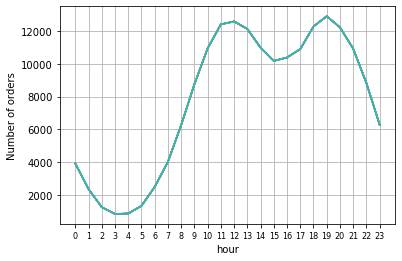

In [34]:
hours = [hour for hour,df in all_data.groupby('hour')]

results = all_data.groupby('hour').count()
plt.plot(hours,results)
plt.xticks(hours,size =8)
plt.ylabel('Number of orders')
plt.xlabel('hour')
plt.grid()
plt.show()


In [ ]:
TASK 04: what products are sold 